# Experiment plotting

This notebook contains the code for plotting results for several simulations.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.plot import Plotter
from lib.measures import *
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list
from lib.calibrationSettings import calibration_lockdown_dates

## Contact tracing implementing Isolation or Testing

In [13]:
# Format: {`filename for plot` : `list of `Plot` objects`}
country, area = 'CH', 'TI'
plots = {
#     f'tracing-isolation-{country}-{area}-isolate_days=14-contacts=25' : [
# #         Plot(label='No tracing', ymax=500,
# #             path='baseline-{country}-{area}/baseline-{country}-{area}-baseline.pk'),
#         Plot(label='7-day quarantine', ymax=300,
#             path=f'tracing-isolation-{country}-{area}/tracing-isolation-{country}-{area}-isolate_days=7-contacts=5000-policy=basic.pk'),
#         Plot(label='14-day quarantine', ymax=200,
#             path=f'tracing-isolation-{country}-{area}/tracing-isolation-{country}-{area}-isolate_days=14-contacts=5000-policy=basic.pk'),
#     ],
    
        f'tracing-isolation-compliance-{country}-{area}' : [
        Plot(label='10\% adoption', ymax=8000,
            path=(f'tracing-isolation-compliance-{country}-{area}/'
                  f'tracing-isolation-compliance-{country}-{area}-p=0.1-policy=basic.pk')),
        Plot(label='25\% adoption', ymax=8000,
            path=(f'tracing-isolation-compliance-{country}-{area}/'
                  f'tracing-isolation-compliance-{country}-{area}-p=0.25-policy=basic.pk')),
        Plot(label='50\% adoption', ymax=8000,
            path=(f'tracing-isolation-compliance-{country}-{area}/'
                  f'tracing-isolation-compliance-{country}-{area}-p=0.5-policy=basic.pk')),
        Plot(label='75\% adoption', ymax=8000,
            path=(f'tracing-isolation-compliance-{country}-{area}/'
                  f'tracing-isolation-compliance-{country}-{area}-p=0.75-policy=basic.pk')),
         Plot(label='100\% adoption', ymax=8000,
            path=(f'tracing-isolation-{country}-{area}/'
                  f'tracing-isolation-{country}-{area}-isolate_days=14-contacts=5000-policy=basic.pk')),
    ],

}

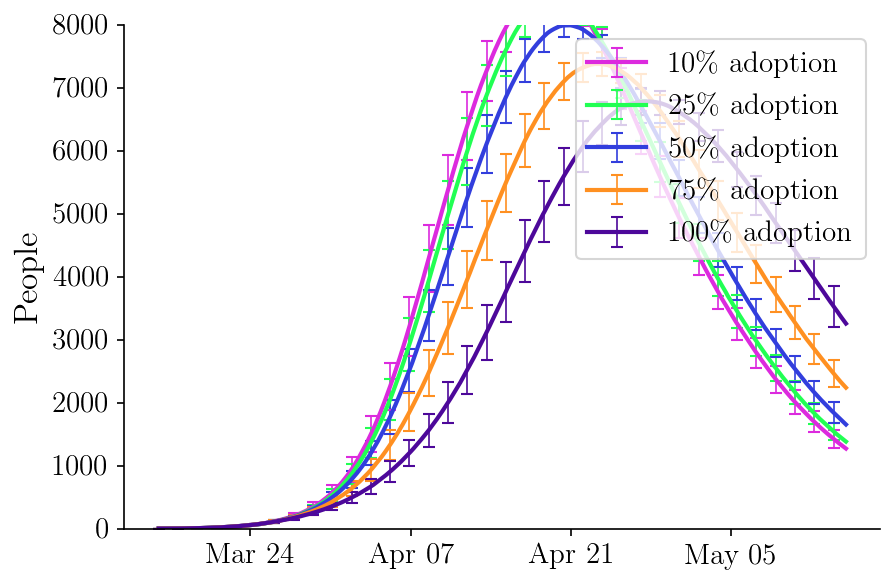

In [14]:
for plot_filename, plots in plots.items():
    
    # extract plot info
    labels = get_properties(plots, 'label')
    paths = get_properties(plots, 'path')
    ymaxs = get_properties(plots, 'ymax')
    
    # load simulations
    results = load_summary_list(paths)
    sims = get_properties(results, 'metadata')
    summaries = get_properties(results, 'summary')
        
    # plots
    plotter = Plotter()
    start_date_lockdown = calibration_lockdown_dates[sims[0].country]['start']
    
    plotter.compare_total_infections(
        summaries, 
        titles=labels, 
        filename=plot_filename, 
        start_date=start_date_lockdown,
        figsize=(6,4), acc=500, 
        ymax=max(ymaxs), errorevery=14)

    

## Other experiment

In [ ]:
plots = {
    # tbd
}

## Narrowcasting Plot

In [ ]:
from lib.town_maps import MapIllustrator
from lib.settings.town_settings_tubingen import bbox

In [ ]:
day_start = 7
day_duration = 14

In [ ]:
# make sure to load a summary file that had `store_mob = True`
summary = load_summary(f'summary_file_with_mob.pk')

# plot
ill = MapIllustrator()
ill.marker_radius = 10.0
map_name = f'narrowcasting-plot-{day_start}-{day_duration}'

sitemap = ill.empirical_infection_probability_map(
    bbox=bbox, 
    site_loc=mob.site_loc, 
    site_type=mob.site_type, 
    site_dict=mob.site_dict, 
    map_name=map_name, 
    sim=summary, 
    t0=TO_HOURS * day_start, 
    t1=TO_HOURS * (day_start + day_duration), 
    delta=0.0, 
    r=0)

In [ ]:
sitemap